In [76]:
import sys
import os
if not hasattr(os, 'once_chdir'):
    os.chdir('..')
    os.once_chdir = True

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [67]:
with open(r'data\data_paths.json','r',encoding='utf-8',) as f:
    data_paths = json.load(f)

def optimze_datatypes(df):
    # Convert datetimes
    datetime_cols = ['Datetime']
    for col in datetime_cols:
        df[col] = pd.to_datetime(df[col], errors='raise')

    # Numeric (float columns)
    numeric_cols = ['client_001', 'client_040', 'client_080', 'client_120']
    for col in numeric_cols:
        # Replace comma with dot for decimal conversion
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.', regex=False))


df = pd.read_csv(data_paths['electric']['batch'])
optimze_datatypes(df)
df.head()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Datetime    140256 non-null  datetime64[ns]
 1   client_001  140256 non-null  float64       
 2   client_040  140256 non-null  float64       
 3   client_080  140256 non-null  float64       
 4   client_120  140256 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.4 MB


In [72]:
df.head()

,Datetime,client_001,client_040,client_080,client_120
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0


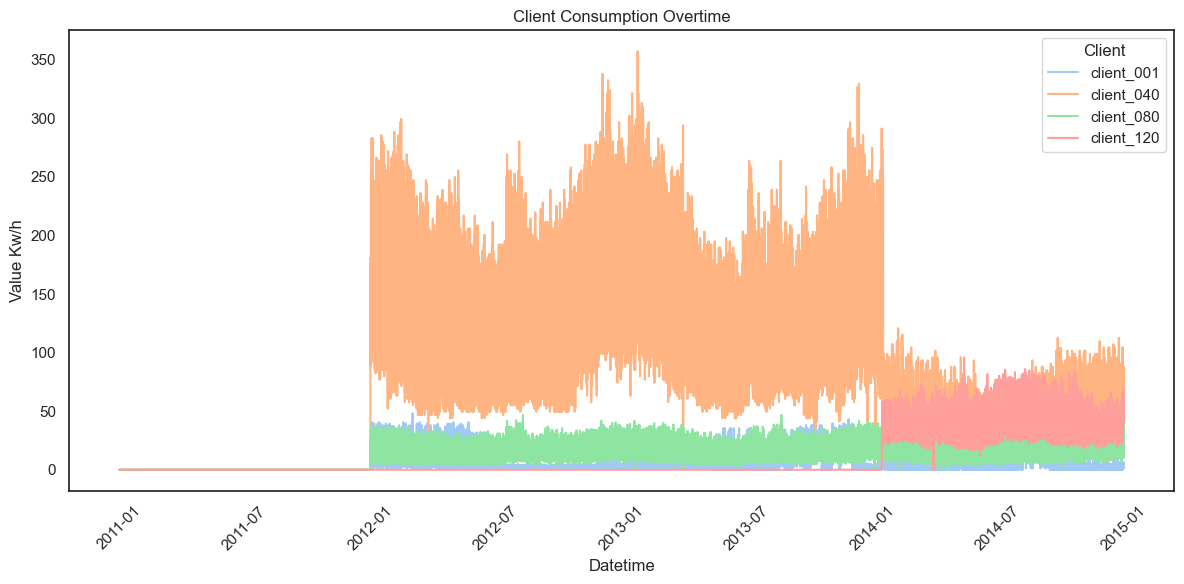

In [ ]:
# Melt the dataframe to long format for plotting multiple columns

numeric_cols = ['client_001', 'client_040', 'client_080', 'client_120']
df_melted = df.melt(id_vars='Datetime', value_vars=numeric_cols, var_name='Client', value_name='Value')

# Plotting
sns.set_theme(style='white',palette='pastel')
plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x='Datetime', y='Value', hue='Client')

plt.title('Client Consumption Overtime')
plt.xlabel('Datetime')
plt.ylabel('Value Kw/h')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()